In [268]:
pip install nltk


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. (12 pts) Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site. 

In [269]:
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')    
nltk.download('punkt_tab')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [270]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import string

In [271]:
text = nltk.corpus.gutenberg.raw('milton-paradise.txt')
tokens = word_tokenize(text)
tokens_lower = [word.lower() for word in tokens]







In [272]:
stop_words = set(stopwords.words('english'))
words_filtered = [
    word for word in tokens_lower 
    if word not in stop_words and word not in string.punctuation
]


In [273]:
lemmatizer = WordNetLemmatizer()


lemmatized_words = [lemmatizer.lemmatize(word) for word in words_filtered]


word_counts = Counter(lemmatized_words)



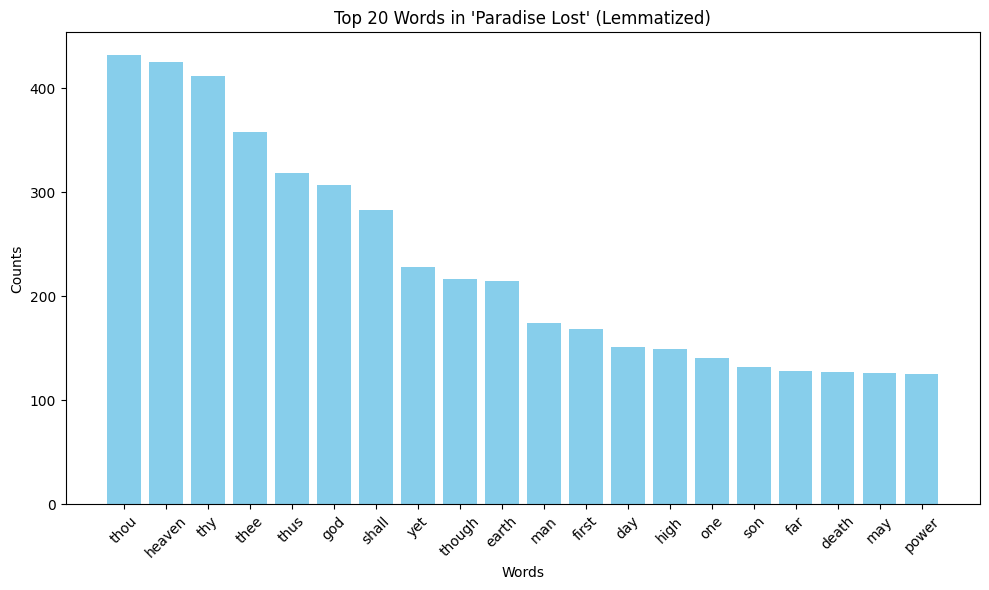

In [274]:

valid_words = {word: count for word, count in word_counts.items() if len(word) > 2}

top_20_words = Counter(valid_words).most_common(20)

words, counts = zip(*top_20_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Words in 'Paradise Lost' (Lemmatized)")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [275]:
# By ensuring that a word's derivative forms are mapped to their relevant base root, lemmatization improves the accuracy of the analysis. By eliminating word ends without taking context into account, stemming may oversimplify.



# 2. (10 pts) Perform Vader Sentiment Analysis on the book.

In [276]:

print(" most Positive Sentences:")
for sentence, score in top_positive:
    print(f"{sentence} (Compound: {score})")

print("\n most Negative Sentences:")
for sentence, score in top_negative:
    print(f"{sentence} (Compound: {score})")

print("\nmost Neutral Sentences:")
for sentence, score in top_neutral:
    print(f"{sentence} (Neutral: {score})")

 most Positive Sentences:
Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great 

# 3. (3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

In [277]:
# Sentences with high compound scores have clearly uplifting, happy, or harmonic themes. For example, passages emphasizing divine creation, heavenly bliss, or God's grandeur may register as positive due to words like "glory," "heaven," and "delight."
# Sentences with low compound scores frequently feature themes of despair, sin, or doom. For example, Paradise Lost recounts Satan's fall, human disobedience, and consequent punishment using negative terminology such as "death," "loss," and "darkness."
# Neutral sentences have little emotional weight and contain a mix of positive and negative terminology. This category frequently includes descriptive or expository sentences that provide background information or neutral observations.

In [278]:
pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 4. (3 pts) Extra Credit 

In [279]:
from wordcloud import WordCloud

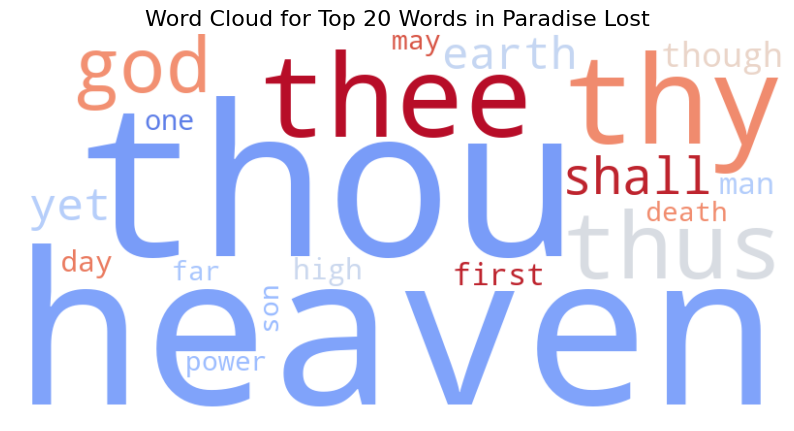

In [280]:
from wordcloud import WordCloud


word_freq_dict = {word: count for word, count in top_words}


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(word_freq_dict)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.title("Word Cloud for Top 20 Words in Paradise Lost", fontsize=16)
plt.show()
